In [1]:
%matplotlib inline
%config InlineBackend.figure_format ='svg'

from sys import path
path.append("../../shared_python_scripts/")

import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks_cwt, savgol_filter

from BrushDensityParser import BrushDensityParser

directory = '/home/lars2/Nextcloud/Eos/Data/School/CE/Masteropdracht/MD SPiVHB/2019-07-03 dense_4x4_grid/'
bdp = BrushDensityParser()

def plotProfiles(subdir, ax):
	poly = bdp.loadDensity(directory + subdir + '/PolyDens.dat')
	solvent = bdp.loadDensity(directory + subdir + '/SolvDens.dat')
	
	# time-averaged profile
	poly_ta = np.mean(poly, axis=0)
	solvent_ta = np.mean(solvent, axis=0)
	
	# Find the inflection point of the polymer profile
	# Smooth using Savitzky–Golay
	poly_ta_smoothed = savgol_filter(poly_ta[:, 2], 21, 2, deriv=1)
	# Inflection point is minimum of first derivative
	inflection_point = poly_ta_smoothed.argmin()
	
	# Find peak of the solvent profile
	peak = find_peaks_cwt(solvent_ta[:, 2], range(6, 45))[0]
	
	ax.plot(poly_ta[:, 1], poly_ta[:, 2])
	ax.plot(solvent_ta[:, 1], solvent_ta[:, 2])
	ax.plot(poly_ta[inflection_point, 1], poly_ta[inflection_point, 2], 'o')
	ax.plot(solvent_ta[peak, 1], solvent_ta[peak, 2], 'o')
	
	ax.set_title(subdir)


## Density profiles plotted for initial 4x4 grid sampling for low grafting density brush system.


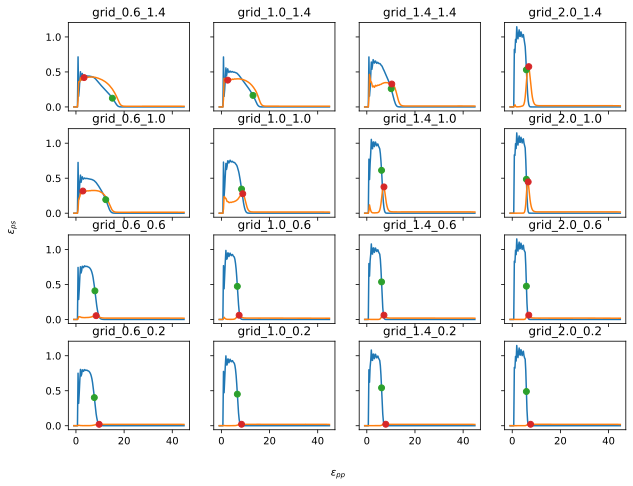

In [2]:
fig, ax = plt.subplots(4, 4, sharex=True, sharey=True, figsize=(10, 7.5), dpi=200)

#                  epp eps      y  x
plotProfiles('grid_0.6_0.2', ax[3, 0])
plotProfiles('grid_1.0_0.2', ax[3, 1])
plotProfiles('grid_1.4_0.2', ax[3, 2])
plotProfiles('grid_2.0_0.2', ax[3, 3])

plotProfiles('grid_0.6_0.6', ax[2, 0])
plotProfiles('grid_1.0_0.6', ax[2, 1])
plotProfiles('grid_1.4_0.6', ax[2, 2])
plotProfiles('grid_2.0_0.6', ax[2, 3])

plotProfiles('grid_0.6_1.0', ax[1, 0])
plotProfiles('grid_1.0_1.0', ax[1, 1])
plotProfiles('grid_1.4_1.0', ax[1, 2])
plotProfiles('grid_2.0_1.0', ax[1, 3])

plotProfiles('grid_0.6_1.4', ax[0, 0])
plotProfiles('grid_1.0_1.4', ax[0, 1])
plotProfiles('grid_1.4_1.4', ax[0, 2])
plotProfiles('grid_2.0_1.4', ax[0, 3])

fig.text(0.5, 0.04, r'$\epsilon_{pp}$', ha='center')
fig.text(0.04, 0.5, r'$\epsilon_{ps}$', va='center', rotation='vertical');


In [2]:
from RegimeClassifier import RegimeClassifier
import pandas as pd

eppList = [0.6, 1.0, 1.4, 2.0]
epsList = [0.2, 0.6, 1.0, 1.4]

dirlist = [['grid_{}_{}'.format(epp, eps) for epp in eppList] for eps in epsList[::-1]]
print(pd.DataFrame(dirlist))

ratio = np.empty((len(eppList), len(epsList)))
overlap = np.empty((len(eppList), len(epsList)))
classification = np.empty((len(eppList), len(epsList)))

for i, row in enumerate(dirlist):
	for j, point in enumerate(row):
		rc = RegimeClassifier(directory + point)
		
		ratio[i][j] = rc.get_ratio()
		overlap[i][j] = rc.get_overlap()
		classification[i][j] = rc.get_classification()


              0             1             2             3
0  grid_0.6_1.4  grid_1.0_1.4  grid_1.4_1.4  grid_2.0_1.4
1  grid_0.6_1.0  grid_1.0_1.0  grid_1.4_1.0  grid_2.0_1.0
2  grid_0.6_0.6  grid_1.0_0.6  grid_1.4_0.6  grid_2.0_0.6
3  grid_0.6_0.2  grid_1.0_0.2  grid_1.4_0.2  grid_2.0_0.2


### Plot ratio of coordination numbers solvent-solvent / solvent-polymer for every point

This doesn't really work. There is no real relation between this ratio and the sorption state of the system.


          0         1         2         3
0  1.295228  1.121797  0.853036  1.328412
1  0.849909  0.501451  0.720497  0.913616
2  0.207375  0.485223  0.685705  0.716760
3  1.416388  2.119494  2.271142  2.318425


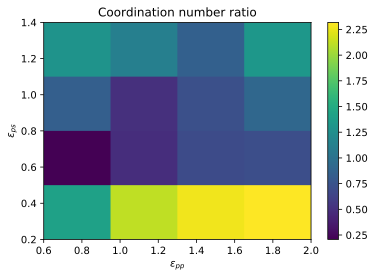

In [4]:
fig, ax = plt.subplots(dpi=200)
pos = ax.imshow(ratio, extent=[0.6, 2.0, 0.2, 1.4], aspect='auto')
ax.set_xlabel(r'$\epsilon_{pp}$')
ax.set_ylabel(r'$\epsilon_{ps}$')
ax.set_title('Coordination number ratio')
plt.colorbar(pos)

print(pd.DataFrame(ratio))


### Plot overlap integral for every grid point. This shows the amount of sorption.


          0         1         2         3
0  7.953273  7.642503  6.559616  1.078001
1  6.036320  3.777173  0.962487  0.450551
2  0.672593  0.196662  0.093921  0.064734
3  0.054721  0.025010  0.016085  0.010110


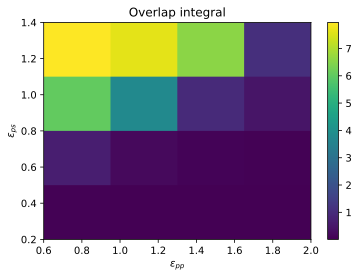

In [5]:
fig, ax = plt.subplots(dpi=200)
pos = ax.imshow(overlap, extent=[0.6, 2.0, 0.2, 1.4], aspect='auto')
ax.set_xlabel(r'$\epsilon_{pp}$')
ax.set_ylabel(r'$\epsilon_{ps}$')
ax.set_title('Overlap integral')
plt.colorbar(pos)

print(pd.DataFrame(overlap))


### Plot classifcation (based on overlap integral and solvent peak density location with respect to polymer surface) for every grid point.
Bicubic interpolation.

0: No sorption  
1: Adsorption, no absorption  
2: Adsorption,    absorption


     0    1    2    3
0  2.0  2.0  1.0  1.0
1  2.0  1.0  1.0  1.0
2  1.0  0.0  0.0  0.0
3  0.0  0.0  0.0  0.0


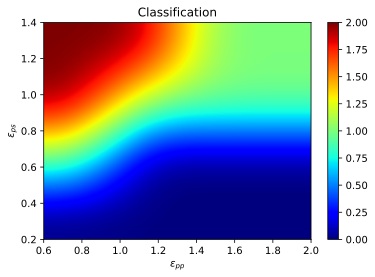

In [6]:
fig, ax = plt.subplots(dpi=200)
pos = ax.imshow(classification, extent=[0.6, 2.0, 0.2, 1.4], aspect='auto', cmap='jet', interpolation='bicubic')
ax.set_xlabel(r'$\epsilon_{pp}$')
ax.set_ylabel(r'$\epsilon_{ps}$')
ax.set_title('Classification')
plt.colorbar(pos)

print(pd.DataFrame(classification))